# Welcome to ViPrez

## This notebook will convert a video to a power point presentation!

### Import Libraries

In [3]:
%pip install opencv-python python-pptx
%pip install Pillow
%pip install python-pptx
%pip install moviepy
%pip install nltk
%pip install SpeechRecognition
%pip install pydub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 42.9 MB/s eta 0:00:00


In [4]:
from moviepy.video.io.VideoFileClip import VideoFileClip
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

In [5]:
# Load NLTK resources
import nltk
# punkt- unsupervised trainable model
nltk.download('punkt')
# stopwords- words that are so common they are basically ignored by typical tokenizers
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Input your mp4 video path

In [9]:
# Enter your video here, i've used a sample video
video_path = '/content/yourvideo.mp4'
# VideoFileClip- loads the video
video = VideoFileClip(video_path)

### Converts video to an audio

In [10]:
def convert_video_to_audio(video_path, audio_path):

    # Get the audio portion of the video clip
    audio_clip = video.audio

    # Write the audio to an audio file
    audio_clip.write_audiofile(audio_path)

    # Close the audio and video clips
    audio_clip.close()
    video.close()


### Saves the audio as output_audio.wav

In [11]:
if __name__ == "__main__":
    # Replace these paths with your actual file paths
    input_video_path = "input_video.mp4"
    output_audio_path = "output_audio.wav"

    # Convert the video to audio and save it
    convert_video_to_audio(input_video_path, output_audio_path)

    print("Video converted to audio and saved as output_audio.wav")

MoviePy - Writing audio in output_audio.wav


MoviePy - Done.
Video converted to audio and saved as output_audio.wav


#### Saving it might take a while...

### Converts Audio to Text

In [12]:
# importing libraries
import speech_recognition as sr
import os
from pydub import AudioSegment
from pydub.silence import split_on_silence

# create a speech recognition object
r = sr.Recognizer()

# a function to recognize speech in the audio file
# so that we don't repeat ourselves in in other functions
def transcribe_audio(path):
    # use the audio file as the audio source
    with sr.AudioFile(path) as source:
        audio_listened = r.record(source)
        # try converting it to text
        text = r.recognize_google(audio_listened)
    return text

# a function that splits the audio file into chunks on silence
# and applies speech recognition
def get_large_audio_transcription_on_silence(path):
    """Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks"""
    # open the audio file using pydub
    sound = AudioSegment.from_file(path)
    # split audio sound where silence is 500 miliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len = 500,
        # adjust this per requirement
        silence_thresh = sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        try:
            text = transcribe_audio(chunk_filename)
        except sr.UnknownValueError as e:
            print("Error:", str(e))
        else:
            text = f"{text.capitalize()}. "
            print (text)
            whole_text += text
    # return the text for all chunks detected
    return whole_text


In [13]:
path = "output_audio.wav"
final_text= get_large_audio_transcription_on_silence(path)
print(final_text)

Error: 
Error: 
Most of my friends are like. 
Guys that i move to dallas with or you know we're friends in dallas. 
Friends at indiana where i went to school or french. 
All my friends that i have been my friends my entire life for still my. 
Pause amazing. 
Most of my friends are like. Guys that i move to dallas with or you know we're friends in dallas. Friends at indiana where i went to school or french. All my friends that i have been my friends my entire life for still my. Pause amazing. 


#### Check out your final text!

In [15]:
final_text

"Most of my friends are like. Guys that i move to dallas with or you know we're friends in dallas. Friends at indiana where i went to school or french. All my friends that i have been my friends my entire life for still my. Pause amazing. "

## Creates Presentation

In [31]:
# Import libraries
from pptx import Presentation
from pptx.util import Inches
import cv2
from google.colab.patches import cv2_imshow

# Function to create a PowerPoint presentation
def create_presentation(slides_data):
    # Create a new PowerPoint presentation object
    prs = Presentation()

    # Iterate through each slide's content and create a slide
    for slide_content in slides_data:
        title, image_path = slide_content

        # Add a blank slide using the blank slide layout (index 5)
        slide = prs.slides.add_slide(prs.slide_layouts[5])

        # Define position and size for the text box
        left = Inches(1)
        top = Inches(1)
        width = Inches(2)
        height = Inches(3)

        # Add a text box to the slide and set its content
        text_box = slide.shapes.add_textbox(left, top, width, height)
        text_frame = text_box.text_frame
        p = text_frame.add_paragraph()
        p.text = title

        # If an image is provided, add it to the slide
        if image_path:
            left = Inches(2)
            top = Inches(2)
            pic = slide.shapes.add_picture(image_path, left, top, width, height)

    # Save the presentation to a file
    prs.save("presentation.pptx")
    print("Presentation saved as presentation.pptx")



## Important Instructions!!
1. Enter how many pages you want.
2. Enter Images according to the number of pages
3. More instructions throughout the code, please follow along 😸

In [32]:
image_paths = ['/content/dallas.jpeg', '/content/download.png', '/content/hqdefault.jpg'] #enter images here

# Split the text into chunks for each slide
words = final_text.split()

slide_pages = 2 # Enter pages here

n = len(words) // slide_pages
chunks = [words[i:i + n] for i in range(0, len(words), n)]
total_pages = len(chunks)

slides_data = []  # Initialize an empty list to store slide data

print('slide pages- ',slide_pages)
print('total pages- ',total_pages)
print("if slide pages < total pages, add one more image to image_paths")
print("if not, dont worry and go ahead :)")

slide pages-  2
total pages-  3
if slide pages < total pages, add one more image to image_paths
if not, dont worry and go ahead :)


### Saves your presentation (finally!)

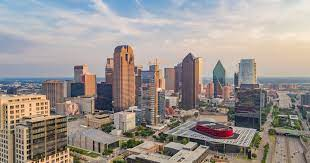

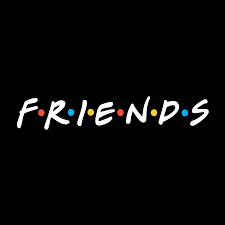

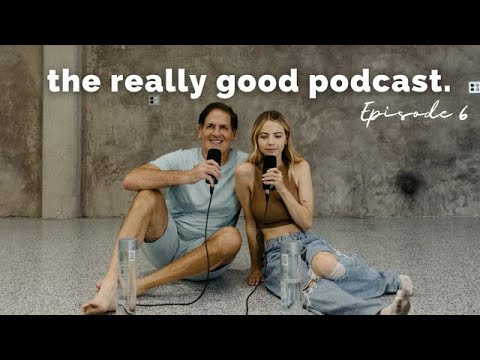

Presentation saved as presentation.pptx


In [33]:
if __name__ == "__main__":

    # Iterate through text chunks and corresponding image paths
    for chunk, image_path in zip(chunks, image_paths):
        img = cv2.imread(image_path)  # Load image using OpenCV
        cv2_imshow(img)  # Display the image using Google Colab's cv2_imshow
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        # Store chunk of text and image path in slides_data list
        slides_data.append((' '.join(chunk), image_path))

    # Create the presentation using the provided data
    create_presentation(slides_data)
